# **Compound Meshes with Jagged Topology**

In [1]:
from polymesh import PolyData
from polymesh.tri.trimesh import TriMesh
from polymesh.grid import Grid
from polymesh.space import StandardFrame
import numpy as np

In [2]:
A = StandardFrame(dim=3)
tri = TriMesh(size=(100, 100), shape=(10, 10), frame=A)
grid2d = Grid(size=(100, 100), shape=(10, 10), eshape='Q4', frame=A)
grid3d = Grid(size=(100, 100, 100), shape=(8, 6, 2), eshape='H8', frame=A)

In [3]:
np.vstack([tri.coords(), grid2d.coords(), grid3d.coords()]).shape

(410, 3)

In [4]:
np.vstack([tri.coords()]).shape

(100, 3)

In [5]:
np.vstack([grid2d.coords(), grid3d.coords()]).shape

(310, 3)

In [6]:
tri.topology().shape, grid2d.topology().shape, grid3d.topology().shape

((162, 3), (100, 4), (96, 8))

In [7]:
np.sum([tri.topology().shape[0], grid2d.topology().shape[0], grid3d.topology().shape[0]])

358

In [8]:
np.sum([grid2d.topology().shape[0], grid3d.topology().shape[0]])

196

In [9]:
mesh = PolyData(frame=A)

In [10]:
mesh['tri', 'T3'] = tri.move(np.array([0., 0., -200]))

In [11]:
mesh['grids', 'Q4'] = grid2d.move(np.array([0., 0., 200]))

In [12]:

mesh['grids', 'H8'] = grid3d

In [13]:
mesh['tri', 'T3'].pointdata['values'] = np.full(tri.coords().shape[0], 5.)
mesh['grids', 'Q4'].pointdata['values'] = np.full(grid2d.coords().shape[0], 10.)
mesh['grids', 'H8'].pointdata['values'] = np.full(grid3d.coords().shape[0], -5.)

In [14]:
mesh['tri', 'T3'].pointdata.values.to_numpy()

array([5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.])

In [15]:
import pyvista as pv
from pyvista import themes

pv.set_plot_theme('paraview')

my_theme = themes.DarkTheme()
my_theme.color = 'red'
my_theme.lighting = False
my_theme.show_edges = True
my_theme.axes.box = True

pv.global_theme.load_theme(my_theme)

In [16]:
from pyvistaqt import BackgroundPlotter

plotter = BackgroundPlotter()
colors = ['red', 'green', 'blue']
for i, cb in enumerate(mesh.cellblocks()):
    data = cb.pointdata['values']
    plotter.add_mesh(cb.to_pv(), scalars=data)

In [17]:
plotter = BackgroundPlotter()
colors = ['red', 'green', 'blue']
for i, cb in enumerate(mesh.cellblocks()):
    m = cb.to_pv(scalars='values', fuse=False)[0]
    plotter.add_mesh(m)

In [18]:
mesh.plot()

In [19]:
mesh.frame

CartesianFrame
([[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]])

In [20]:
mesh['grids', 'H8'].frame

CartesianFrame
([[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]])

In [21]:
addr = mesh['grids', 'H8'].address
mesh[addr]

PolyData({'size': (100, 100, 100), 'shape': (8, 6, 2)})

In [22]:
mesh['grids'].topology()

TopologyArray
([[100, 111, 112, 101], [101, 112, 113, ... [384, 405, 408, 387, 385, 406, 409, 388]])

In [23]:
mesh['grids'].address

['grids']

In [24]:
mesh.pd

In [25]:
mesh['grids'].frame

CartesianFrame
([[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]])

In [26]:
mesh['tri']

PolyData({'T3': PolyData({'size': (100, 100), 'shape': (10, 10)})})

In [27]:
mesh['tri'].cd

In [28]:
mesh.to_standard_form()

PolyData({'tri': PolyData({'T3': PolyData({'size': (100, 100), 'shape': (10, 10)})}), 'grids': PolyData({'Q4': PolyData({'size': (100, 100), 'shape': (10, 10)}), 'H8': PolyData({'size': (100, 100, 100), 'shape': (8, 6, 2)})})})

In [29]:
triangles = mesh['tri'].detach()

In [30]:
grids = mesh['grids'].detach()

In [31]:
#grids.plot()

In [32]:
cb = list(grids.cellblocks(inclusive=True))

In [33]:
cb[0].topology().shape

(100, 4)

In [34]:
grids['H8'].parent.topology()

TopologyArray
([[100, 111, 112, 101], [101, 112, 113, ... [384, 405, 408, 387, 385, 406, 409, 388]])

In [35]:
grids.topology()

TopologyArray
([[100, 111, 112, 101], [101, 112, 113, ... [384, 405, 408, 387, 385, 406, 409, 388]])

In [36]:
for cb in grids.cellblocks():
    print(cb.address, cb.key)

['Q4'] Q4
['H8'] H8


In [37]:
for cb in grids['H8'].cellblocks(inclusive=True):
    print(cb.address, cb.key)

['H8'] H8


In [38]:
list(grids['H8'].cellblocks(inclusive=True))

[PolyData({})]

In [39]:
grids['H8'].__dict__

{'pointdata': None,
 'cell_index_manager': <polymesh.polydata.IndexManager at 0x1c81554d7c0>,
 'celldata': <polymesh.cells.h8.H8 at 0x1c815549f10>,
 'celltype': polymesh.cells.h8.H8,
 '_frame': None,
 '_newaxis': 2,
 '_parent': PolyData({'Q4': PolyData({}), 'H8': PolyData({})}),
 '_config': LinkedDeepDict({'pv': LinkedDeepDict({'default': LinkedDeepDict({'show_edges': True})})}),
 'point_index_manager': <polymesh.polydata.IndexManager at 0x1c81554d580>,
 '_root': PolyData({'Q4': PolyData({}), 'H8': PolyData({})}),
 '_locked': None,
 '_key': 'H8'}

In [40]:
mesh.coords(), mesh['grids', 'H8'].coords(from_cells=True), mesh['grids'].coords(from_cells=True)

(VectorBase([[   0.        ,    0.        , -200.        ],
             [  11.11111111,    0.        , -200.        ],
             [  22.22222222,    0.        , -200.        ],
             ...,
             [ 100.        ,  100.        ,    0.        ],
             [ 100.        ,  100.        ,   50.        ],
             [ 100.        ,  100.        ,  100.        ]]),
 VectorBase([[  0.        ,   0.        ,   0.        ],
             [  0.        ,   0.        ,  50.        ],
             [  0.        ,   0.        , 100.        ],
             [  0.        ,  16.66666667,   0.        ],
             [  0.        ,  16.66666667,  50.        ],
             [  0.        ,  16.66666667, 100.        ],
             [  0.        ,  33.33333333,   0.        ],
             [  0.        ,  33.33333333,  50.        ],
             [  0.        ,  33.33333333, 100.        ],
             [  0.        ,  50.        ,   0.        ],
             [  0.        ,  50.        ,  50.    

In [41]:
mesh.to_standard_form()

PolyData({'tri': PolyData({'T3': PolyData({'size': (100, 100), 'shape': (10, 10)})}), 'grids': PolyData({'Q4': PolyData({'size': (100, 100), 'shape': (10, 10)}), 'H8': PolyData({'size': (100, 100, 100), 'shape': (8, 6, 2)})})})

In [42]:
mesh.coords()

VectorBase([[   0.        ,    0.        , -200.        ],
            [  11.11111111,    0.        , -200.        ],
            [  22.22222222,    0.        , -200.        ],
            ...,
            [ 100.        ,  100.        ,    0.        ],
            [ 100.        ,  100.        ,   50.        ],
            [ 100.        ,  100.        ,  100.        ]])

In [43]:
mesh['grids', 'H8'].coords(from_cells=True)

VectorBase([[  0.        ,   0.        ,   0.        ],
            [  0.        ,   0.        ,  50.        ],
            [  0.        ,   0.        , 100.        ],
            [  0.        ,  16.66666667,   0.        ],
            [  0.        ,  16.66666667,  50.        ],
            [  0.        ,  16.66666667, 100.        ],
            [  0.        ,  33.33333333,   0.        ],
            [  0.        ,  33.33333333,  50.        ],
            [  0.        ,  33.33333333, 100.        ],
            [  0.        ,  50.        ,   0.        ],
            [  0.        ,  50.        ,  50.        ],
            [  0.        ,  50.        , 100.        ],
            [  0.        ,  66.66666667,   0.        ],
            [  0.        ,  66.66666667,  50.        ],
            [  0.        ,  66.66666667, 100.        ],
            [  0.        ,  83.33333333,   0.        ],
            [  0.        ,  83.33333333,  50.        ],
            [  0.        ,  83.33333333, 100.   

In [44]:
mesh['grids'].coords(from_cells=True)

VectorBase([[  0.        ,   0.        , 200.        ],
            [  0.        ,  10.        , 200.        ],
            [  0.        ,  20.        , 200.        ],
            [  0.        ,  30.        , 200.        ],
            [  0.        ,  40.        , 200.        ],
            [  0.        ,  50.        , 200.        ],
            [  0.        ,  60.        , 200.        ],
            [  0.        ,  70.        , 200.        ],
            [  0.        ,  80.        , 200.        ],
            [  0.        ,  90.        , 200.        ],
            [  0.        , 100.        , 200.        ],
            [ 10.        ,   0.        , 200.        ],
            [ 10.        ,  10.        , 200.        ],
            [ 10.        ,  20.        , 200.        ],
            [ 10.        ,  30.        , 200.        ],
            [ 10.        ,  40.        , 200.        ],
            [ 10.        ,  50.        , 200.        ],
            [ 10.        ,  60.        , 200.   

In [45]:
mesh.coords().shape

(410, 3)

In [46]:
mesh['grids'].is_root()

False

In [47]:
mesh['grids'].topology().shape[0]

196

In [48]:
mesh['grids', 'Q4'].source()

PolyData({'tri': PolyData({'T3': PolyData({'size': (100, 100), 'shape': (10, 10)})}), 'grids': PolyData({'Q4': PolyData({'size': (100, 100), 'shape': (10, 10)}), 'H8': PolyData({'size': (100, 100, 100), 'shape': (8, 6, 2)})})})

In [49]:
mesh.coords()

VectorBase([[   0.        ,    0.        , -200.        ],
            [  11.11111111,    0.        , -200.        ],
            [  22.22222222,    0.        , -200.        ],
            ...,
            [ 100.        ,  100.        ,    0.        ],
            [ 100.        ,  100.        ,   50.        ],
            [ 100.        ,  100.        ,  100.        ]])

In [50]:
mesh['grids', 'H8'].coords(from_cells=True)

VectorBase([[  0.        ,   0.        ,   0.        ],
            [  0.        ,   0.        ,  50.        ],
            [  0.        ,   0.        , 100.        ],
            [  0.        ,  16.66666667,   0.        ],
            [  0.        ,  16.66666667,  50.        ],
            [  0.        ,  16.66666667, 100.        ],
            [  0.        ,  33.33333333,   0.        ],
            [  0.        ,  33.33333333,  50.        ],
            [  0.        ,  33.33333333, 100.        ],
            [  0.        ,  50.        ,   0.        ],
            [  0.        ,  50.        ,  50.        ],
            [  0.        ,  50.        , 100.        ],
            [  0.        ,  66.66666667,   0.        ],
            [  0.        ,  66.66666667,  50.        ],
            [  0.        ,  66.66666667, 100.        ],
            [  0.        ,  83.33333333,   0.        ],
            [  0.        ,  83.33333333,  50.        ],
            [  0.        ,  83.33333333, 100.   

In [51]:
mesh['grids'].coords(from_cells=True).shape

(310, 3)

In [52]:
np.vstack([mesh['grids','Q4'].coords(from_cells=True), mesh['grids','H8'].coords(from_cells=True)]).shape

(310, 3)

In [53]:
mesh['tri'].coords(from_cells=True).shape

(100, 3)

In [54]:
mesh['tri'].coords(from_cells=True).shape, mesh['grids'].coords(from_cells=True).shape

((100, 3), (310, 3))

In [55]:
mesh.plot()

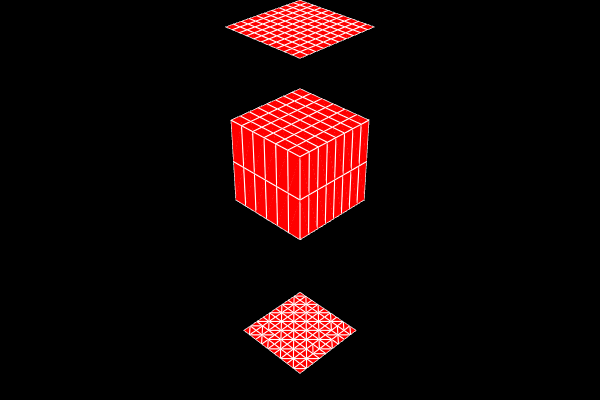

In [65]:
from polymesh import PolyData
from polymesh.tri.trimesh import TriMesh
from polymesh.grid import Grid
from polymesh.space import StandardFrame
import numpy as np

A = StandardFrame(dim=3)
tri = TriMesh(size=(100, 100), shape=(10, 10), frame=A)
grid2d = Grid(size=(100, 100), shape=(10, 10), eshape='Q4', frame=A)
grid3d = Grid(size=(100, 100, 100), shape=(8, 6, 2), eshape='H8', frame=A)

mesh = PolyData(frame=A)
mesh['tri', 'T3'] = tri.move(np.array([0., 0., -200]))
mesh['grids', 'Q4'] = grid2d.move(np.array([0., 0., 200]))
mesh['grids', 'H8'] = grid3d

mesh['tri', 'T3'].pointdata['values'] = np.full(tri.coords().shape[0], 5.)
mesh['grids', 'Q4'].pointdata['values'] = np.full(grid2d.coords().shape[0], 10.)
mesh['grids', 'H8'].pointdata['values'] = np.full(grid3d.coords().shape[0], -5.)

mesh['tri', 'T3'].pointdata.values.to_numpy()

import pyvista as pv
from pyvista import themes

my_theme = themes.DarkTheme()
my_theme.color = 'red'
my_theme.lighting = False
my_theme.show_edges = True
my_theme.axes.box = True

pv.set_plot_theme(my_theme)

mesh.pvplot(notebook=True, window_size = (600, 400), theme=my_theme, jupyter_backend='static')